# Random forest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
RSEED = 50

запись всех файлов

In [ ]:
def normalize(a):
  names = a.columns
  d = a.to_numpy()
  d = np.transpose(d)
  for i in range(0,d.shape[0]):
    d[i] = preprocessing.normalize([d[i]])
  a = pd.DataFrame(d)
  a = a.transpose()
  a.columns = names
  return a

In [ ]:
def normalize2(a):
  names = a.columns
  d = a.to_numpy()
  
  for i in range(0,d.shape[0]):
    d[i] = preprocessing.normalize([d[i]])
  a = pd.DataFrame(d)
  a.columns = names
  return a

In [ ]:
normalize2(df1)

In [ ]:
def preparetion_dataset(temp):
  temp.drop('TIME_(s)', axis=1, inplace=True)
  temp.drop('DEPTH_(m)',axis=1,inplace=True)
  #temp.drop('ROP5_(m/h)',axis=1,inplace=True)
  #temp.drop('HKLA_(1000 kgf)',axis=1,inplace=True)
  temp.drop('SWOB_(1000 kgf)',axis=1,inplace=True)
  temp.drop('BLKP_(m)',axis=1,inplace=True)

  temp.drop('TVD_(m)',axis=1,inplace=True)
  temp.drop('HDTH_(m)',axis=1,inplace=True)
  temp.drop('TFLO_(L/min)',axis=1,inplace=True)
  temp.drop('SPPA_(bar)',axis=1,inplace=True)




  temp.loc[(temp.labels == 'success' ), 'labels'] = 1
  temp.loc[(temp.labels == 'Pack-off' ), 'labels'] = 0

  temp = temp.replace({'Not Available': np.nan})


  # Iterate through the columns
  for col in list(temp.columns):
    # Select columns that should be numeric
    if ( 'TVD_(m)' in col or 'DEPTH_(m)' in col or 'HDTH_(m)' in 
        col or 'BLKP_(m)' in col or 'HKLA_(1000 kgf)' in col or 'ROP5_(m/h)' in col or 'RPM_(c/min)' in col or 'STOR_(kN.m)' in col or 'SWOB_(1000 kgf)' in col or 'TFLO_(L/min)' in col or 'SPPA_(bar)' in col or 'labels' in col):
        # Convert the data type to float
        temp[col] = temp[col].astype(float)

  temp = temp.fillna(0)
  
  return temp


In [ ]:
def trash(temp):
  names = temp.columns
  for j in range(0,len(names)):
    for i in [names[j]]:
      q75,q25 = np.percentile(temp.loc[:,i],[75,25])
      intr_qr = q75-q25

      max = q75+(1.5*intr_qr)
      min = q25-(1.5*intr_qr)

      temp.loc[temp[i] < min,i] = np.nan
      temp.loc[temp[i] > max,i] = np.nan
  temp = temp.fillna(0)
  return temp

In [ ]:
from pandas.core.frame import DataFrame

temp_arr = np.array([
                      
                    '/content/drive/MyDrive/Colab Notebooks/Annotated/276_SMNG_276_Механический_Каротаж_200403-200411_Режим_записи.csv',
                      
                      '/content/drive/MyDrive/Colab Notebooks/Annotated/243_1.csv',
                     '/content/drive/MyDrive/Colab Notebooks/Annotated/243_2.csv',
                     '/content/drive/MyDrive/Colab Notebooks/Annotated/243_3.csv',
                     '/content/drive/MyDrive/Colab Notebooks/Annotated/243_4.csv',
                     '/content/drive/MyDrive/Colab Notebooks/Annotated/243_5.csv',
                      
                      '/content/drive/MyDrive/Colab Notebooks/Annotated/248_1.csv',
                     '/content/drive/MyDrive/Colab Notebooks/Annotated/248_2.csv',
                     '/content/drive/MyDrive/Colab Notebooks/Annotated/248_3.csv',
                     '/content/drive/MyDrive/Colab Notebooks/Annotated/248_4.csv',
                     '/content/drive/MyDrive/Colab Notebooks/Annotated/248_5.csv',
                     
                     ])
df = pd.DataFrame()
train_labels =[]
for i in range(0,len(temp_arr)):
  temp = pd.read_csv(temp_arr[i],delimiter=';')
  temp = preparetion_dataset(temp)
  temp = trash(temp)

  train_labels_temp = np.array(temp.pop('labels'))
  train_labels = np.append(train_labels,train_labels_temp)
  
  df = pd.concat([df,normalize(temp)],ignore_index=True)
  

In [ ]:
display(df)

,ROP5_(m/h),STOR_(kN.m),RPM_(c/min),HKLA_(1000 kgf)
0,0.0,0.000000,0.000000e+00,0.000000
1,0.0,0.000000,0.000000e+00,0.000000
2,0.0,0.000000,0.000000e+00,0.000000
3,0.0,0.000000,0.000000e+00,0.000000
4,0.0,0.000000,0.000000e+00,0.000000
...,...,...,...,...
1038485,0.0,-0.000025,7.973324e-07,0.001171
1038486,0.0,-0.000025,8.005604e-07,0.001169
1038487,0.0,-0.000025,8.683498e-07,0.001168
1038488,0.0,-0.000026,8.457534e-07,0.001171


In [ ]:
from pandas.core.frame import DataFrame

temp_arr = np.array([
                      '/content/drive/MyDrive/Colab Notebooks/Annotated/241_1.csv',
                     '/content/drive/MyDrive/Colab Notebooks/Annotated/241_2.csv',
                     '/content/drive/MyDrive/Colab Notebooks/Annotated/241_3.csv',
                     '/content/drive/MyDrive/Colab Notebooks/Annotated/241_4.csv'
                     ])
df1 = pd.DataFrame()
test_labels = []
time = []
for i in range(0,len(temp_arr)):
  temp = pd.read_csv(temp_arr[i],delimiter=';')

  time = np.append(time,(temp['TIME_(s)']))

  temp = preparetion_dataset(temp)
  temp = trash(temp)

  test_labels_temp = np.array(temp.pop('labels'))
  test_labels = np.append(test_labels,test_labels_temp)

  #df1 = pd.concat([df1,normalize(temp)],ignore_index=True)
  df1 = pd.concat([df1,normalize(temp)],ignore_index=True)

In [ ]:
train = df
test = df1

In [ ]:
print(test_labels,train_labels)

[1. 1. 1. ... 1. 1. 1.] [1. 1. 1. ... 1. 1. 1.]


# удаление выбросов

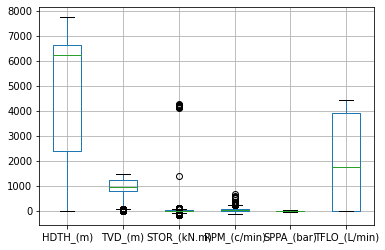

In [ ]:
test.boxplot()

In [ ]:
names = test.columns
for j in range(0,len(names)):
  for i in [names[j]]:
      q75,q25 = np.percentile(test.loc[:,i],[75,25])
      intr_qr = q75-q25

      max = q75+(1.5*intr_qr)
      min = q25-(1.5*intr_qr)

      test.loc[test[i] < min,i] = np.nan
      test.loc[test[i] > max,i] = np.nan


In [ ]:
test.isnull().sum()


HDTH_(m)            0
TVD_(m)         12704
STOR_(kN.m)      3624
RPM_(c/min)        96
SPPA_(bar)          0
TFLO_(L/min)        0
dtype: int64

In [ ]:
test = test.fillna(0)

In [ ]:
test.isnull().sum()


HDTH_(m)        0
TVD_(m)         0
STOR_(kN.m)     0
RPM_(c/min)     0
SPPA_(bar)      0
TFLO_(L/min)    0
dtype: int64

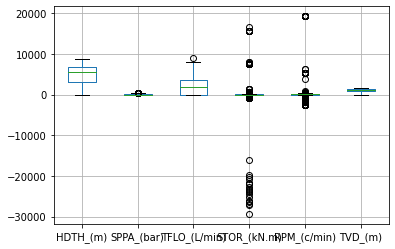

In [ ]:
train.boxplot()

In [ ]:
names = train.columns
for j in range(0,len(names)):
  for i in [names[j]]:
      q75,q25 = np.percentile(train.loc[:,i],[75,25])
      intr_qr = q75-q25

      max = q75+(1.5*intr_qr)
      min = q25-(1.5*intr_qr)

      train.loc[train[i] < min,i] = np.nan
      train.loc[train[i] > max,i] = np.nan

In [ ]:
train.isnull().sum()


HDTH_(m)           0
SPPA_(bar)        24
TFLO_(L/min)       1
STOR_(kN.m)     6739
RPM_(c/min)     3408
TVD_(m)            0
dtype: int64

In [ ]:
train = train.fillna(0)

In [ ]:
train.isnull().sum()


HDTH_(m)        0
SPPA_(bar)      0
TFLO_(L/min)    0
STOR_(kN.m)     0
RPM_(c/min)     0
TVD_(m)         0
dtype: int64

# нормализация данных

In [ ]:
from sklearn import preprocessing

In [ ]:
names = test.columns

d = test.to_numpy()
d = np.transpose(d)

for i in range(0,d.shape[0]):
  d[i] = preprocessing.normalize([d[i]])

test = pd.DataFrame(d)
test = test.transpose()
test.columns = names

display(test)

In [ ]:
names = train.columns

d = train.to_numpy()
d = np.transpose(d)

for i in range(0,d.shape[0]):
  d[i] = preprocessing.normalize([d[i]])

train = pd.DataFrame(d)
train = train.transpose()
train.columns = names

display(train)

# обучение

In [ ]:
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, class_weight='balanced',verbose = 1)

# Fit on training data
model.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished


RandomForestClassifier(class_weight='balanced', max_features='sqrt', n_jobs=-1,
                       random_state=50, verbose=1)

In [ ]:
# Извлекаем значимость параметров
fi = pd.DataFrame({'feature': list(train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Выводим значения
display(fi)

,feature,importance
2,RPM_(c/min),0.459898
1,STOR_(kN.m),0.335491
3,HKLA_(1000 kgf),0.188583
0,ROP5_(m/h),0.016028


In [ ]:
# Действующая классификация
rf_predictions = model.predict(test)
# Вероятности для каждого класса
rf_probs = model.predict_proba(test)[:, 1]
print(rf_predictions)
print(rf_probs)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s


[1. 1. 1. ... 1. 1. 1.]
[0.99976506 1.         1.         ... 1.         1.         0.99976506]


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.8s finished


In [ ]:
np.unique(rf_predictions)

array([0., 1.])

In [ ]:
from sklearn.metrics import roc_auc_score

# Рассчитываем roc auc
roc_value = roc_auc_score(test_labels, rf_probs)
print(roc_value)

0.5780880570223228


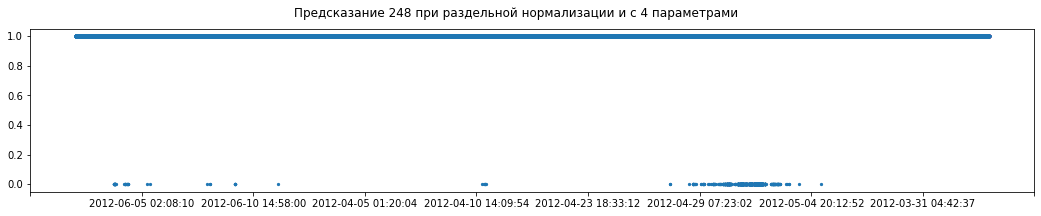

In [ ]:
from matplotlib.ticker import LinearLocator
X = time
fig, ax = plt.subplots(figsize=(18,3))
ax.xaxis.set_major_locator(LinearLocator(10))
plt.suptitle('Предсказание 248 при раздельной нормализации и с 4 параметрами')
plt.scatter(X,rf_predictions,s=5)

plt.show()

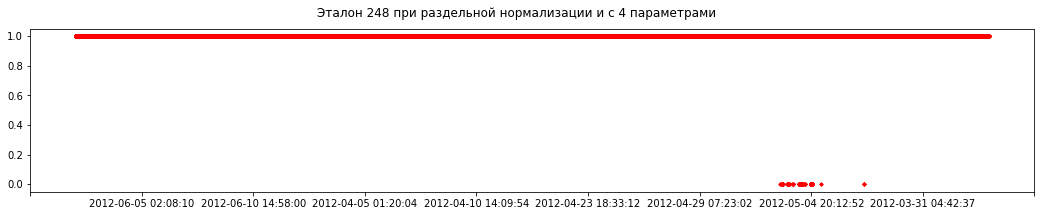

In [ ]:
from matplotlib.ticker import LinearLocator

X = time
fig, ax = plt.subplots(figsize=(18,3))
ax.xaxis.set_major_locator(LinearLocator(10))
plt.suptitle('Эталон 248 при раздельной нормализации и с 4 параметрами')
plt.scatter(X, test_labels,color='red',s=5)

plt.show()

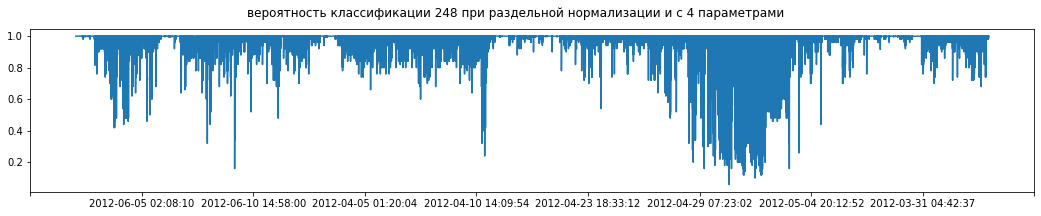

In [ ]:
from matplotlib.ticker import LinearLocator

X = time
fig, ax = plt.subplots(figsize=(18,3))
ax.xaxis.set_major_locator(LinearLocator(10))
plt.suptitle('вероятность классификации 248 при раздельной нормализации и с 4 параметрами')

plt.plot(X, rf_probs)

plt.show()